# Project 2 
## By: Maria Angel Palacios Sarmiento
## CS 301 - 003

In [511]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression


# Task 1 -> Exploratory Data Analysis 
- Import and examine the dataset
- Do we have any missing values?
- Is there any delimiter?
- Types
- Which are numerical? Which are categorical? What are their distributions?




In [512]:
# Load the Bank Dataset
bank = pd.read_csv("data/bank.csv", delimiter=';')
bank.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [513]:
# Check what type is each column
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

## Identify Numerical Data and what what each one represents
- "Age" (numeric)
- "Balance" column represents the average yearly balance, in euros and it is a (numerical) variable.
- "Day" column represents the last contact day of the month and it is a (numerical) variable
- "duration" column represents the last contact duration, in seconds (numeric)   
- "campaign" column represents the number of contacts performed during this campaign and for this client (numeric, includes last contact)    
- "pdays" column represents represents the number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)      
- "previous" column represents the number of contacts performed before this campaign and for this client (numeric)

In [514]:
numerical_columns = [
    'age',
    'balance',
    'day',
    'duration',
    'campaign',
    'pdays',
    'previous'
    
]

## Identify Categorical Data and what each one represents
 - "job" column represents the type of job and it is (categorical): It includes the following categories -->  "admin", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student",  "blue-collar", "self-employed", "retired", "technician", "services"
 - "marital" column represents the marital status and it is (categorical): It includes the following categories --> "married", "divorced", "single"; note: "divorced" means divorced or widowed)
 - "education column represents the type of education and it is (categorical): It includes the following categories --> "unknown", "secondary", "primary", "tertiary"
 - "default" column represents either it the person has credit in default (binary: "yes","no")
 - "housing" column represents either if the person has housing loan? (binary: "yes","no")
- "loan" column represents either if the person has personal loan? (binary: "yes","no"), it is related with the last contact of the current campaign.
- "contact" column represents either if the person has any contact communication type (categorical: "unknown", "telephone", "cellular")
- "month" column represents the last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- "poutcome" column represents the outcome of the previous marketing campaign  and it is (categorical): It includes the following categories --> "unknown", "other", "failure", "success")

- Output variable "Y" (desired target): Represenetes if the client has subscribed a term deposit (binary: "yes","no")


In [515]:
categorical_columns = [
    "job", "marital", "education", "default", 
    "housing", "loan", "contact", "month", 
    "poutcome", "y"
]

## Take Care of missing data
- Replace numerical missing data with mean values.
1. First, we check if we have null values inside our columns using the isnull method

   

In [516]:
#check for any missing values
bank.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

 - Since there are not null values in our dataset, we continue to describe how the Data is being held:
Statistical Summary: For numerical features, get a summary of statistics (mean, min, max, std deviation, etc.).
- Check for negative values

In [517]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


Since we are getting negative values for our balance and pdays column, we would like to check what is the best solution or action to take to treat our data. Therefore for a better understanding about them, we proceed to illustrate a box plot to check for any negative outliers

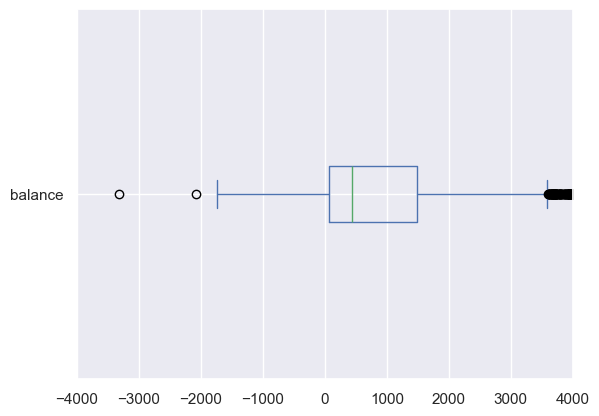

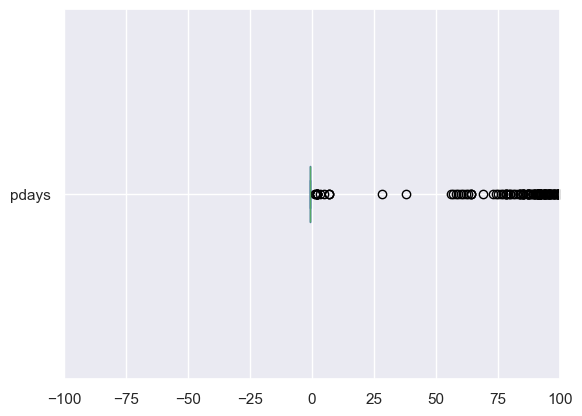

In [518]:
bank['balance'].plot(kind='box', vert=False)  # Box plot to identify outliers
# zoom in
plt.xlim(-4000, 4000)

# Show the plot
plt.show()

bank['pdays'].plot(kind='box', vert=False)  # Box plot to identify outliers
# zoom in
plt.xlim(-100, 100)

# Show the plot
plt.show()


Taking into account the definitions of pdays and balance and the box plot with outliers on the negative side we could take the following approach for each variable. 

### pdays:
Replace -1 with 0, which indicates that the client was never contacted before (we know this because -1 means client was not previously contacted). It will help us later on when we train our model.

### balance:
Replace Negative Values with the Median, considering that they might be outliers but still keeping the data reasonable.


In [519]:
bank['pdays'] = bank['pdays'].apply(lambda x: 0 if x == -1 else x)

#get the updated table
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,40.586154,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,99.787552,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,0.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,0.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,0.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,0.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [520]:
# Get the median excluding the negative values
median_balance = bank[bank['balance'] >= 0]['balance'].median()

# Replace the negative numbers with the median, we already know there are no null values
bank['balance'] = bank['balance'].apply(lambda x: median_balance if x < 0 else x)

#get updated table 
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1493.211900,15.915284,263.961292,2.793630,40.586154,0.542579
std,10.576211,2976.078013,8.247667,259.856633,3.109807,99.787552,1.693562
min,19.000000,0.000000,1.000000,4.000000,1.000000,0.000000,0.000000
25%,33.000000,171.000000,9.000000,104.000000,1.000000,0.000000,0.000000
50%,39.000000,542.000000,16.000000,185.000000,2.000000,0.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,0.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


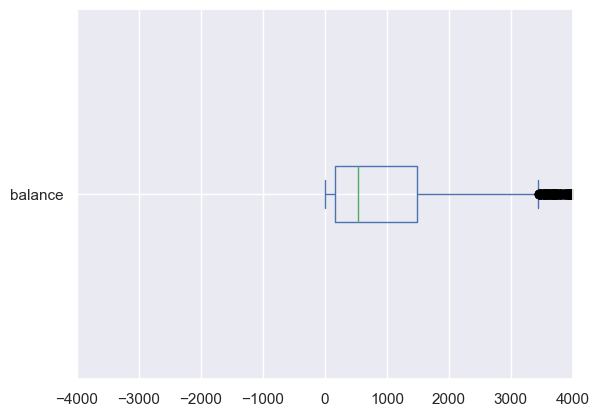

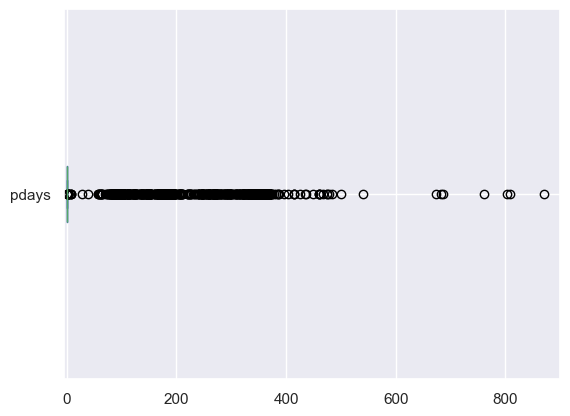

In [521]:
#check for updated plot
bank['balance'].plot(kind='box', vert=False)  # Box plot to identify outliers
# zoom in
plt.xlim(-4000, 4000)

# Show the plot
plt.show()

bank['pdays'].plot(kind='box', vert=False)  # Box plot to identify outliers
# zoom in
plt.xlim(-5, 900)

# Show the plot
plt.show()


## Encode Categorical data and Visualization

In [522]:
# Convert Y -> output to yes = 1 and no= 0.
bank.loc[bank['y'] == 'no', 'y'] = 0
bank.loc[bank['y'] == 'yes', 'y'] = 1

#Verify it works
print(bank.loc[bank['y'] == 1])

      age            job   marital  education default  balance housing loan  \
13     20        student    single  secondary      no    502.0      no   no   
30     68        retired  divorced  secondary      no   4189.0      no   no   
33     32     management    single   tertiary      no   2536.0     yes   no   
34     49     technician   married   tertiary      no   1235.0      no   no   
36     78        retired  divorced    primary      no    229.0      no   no   
...   ...            ...       ...        ...     ...      ...     ...  ...   
4494   26     technician    single  secondary      no    668.0     yes   no   
4503   60  self-employed   married    primary      no    362.0      no  yes   
4504   42    blue-collar    single  secondary      no   1080.0     yes  yes   
4505   32         admin.    single  secondary      no    620.0     yes   no   
4511   46    blue-collar   married  secondary      no    668.0     yes   no   

        contact  day month  duration  campaign  pda

The reason for visualizing the correlation matrix using both Pearson and Spearman methods is to gain insights into the relationships between variables. By understanding these correlations, we can identify which features are strongly related, which can help us in feature selection and reducing multicollinearity. The heatmaps provide a clear and intuitive representation of these relationships, allowing us to quickly assess where to focus our analysis or model building efforts. This is particularly important in our context, as it helps us understanding correlations between attributes—such as demographics, financial metrics, and customer behavior—guides better modeling decisions. For example, evaluating correlations among features like age, balance, and education helps pinpoint which variables significantly influence the target variable (y), improving our predictive models.

### Colors
The heatmap uses a color gradient, typically ranging from blue to red. In this case, the setting means that red indicates positive correlations, while blue indicates negative correlations.

In [523]:
# Store relevant columns as variables
#X = bank[['day', 'campaign','pdays','balance','education','job']] 
X = bank[['day', 'campaign','pdays','balance','education']]

However, since education is a categorical variable, we must convert it to numerical values 

In [524]:
#X = pd.get_dummies(X, columns=['education','job'],drop_first=True)
X = pd.get_dummies(X, columns=['education'],drop_first=True)
y = bank['y'].astype(int).values.ravel() 
print(X.columns)

Index(['day', 'campaign', 'pdays', 'balance', 'education_secondary',
       'education_tertiary', 'education_unknown'],
      dtype='object')


In [525]:
#X = X[['day', 'campaign','pdays','balance','job_retired','education_secondary']]
X = X[['day', 'campaign','pdays','balance','education_secondary']]

In [526]:
X.head()

,day,campaign,pdays,balance,education_secondary
0,19,1,0,1787.0,False
1,11,1,339,4789.0,True
2,16,1,330,1350.0,False
3,3,4,0,1476.0,False
4,5,1,0,0.0,True


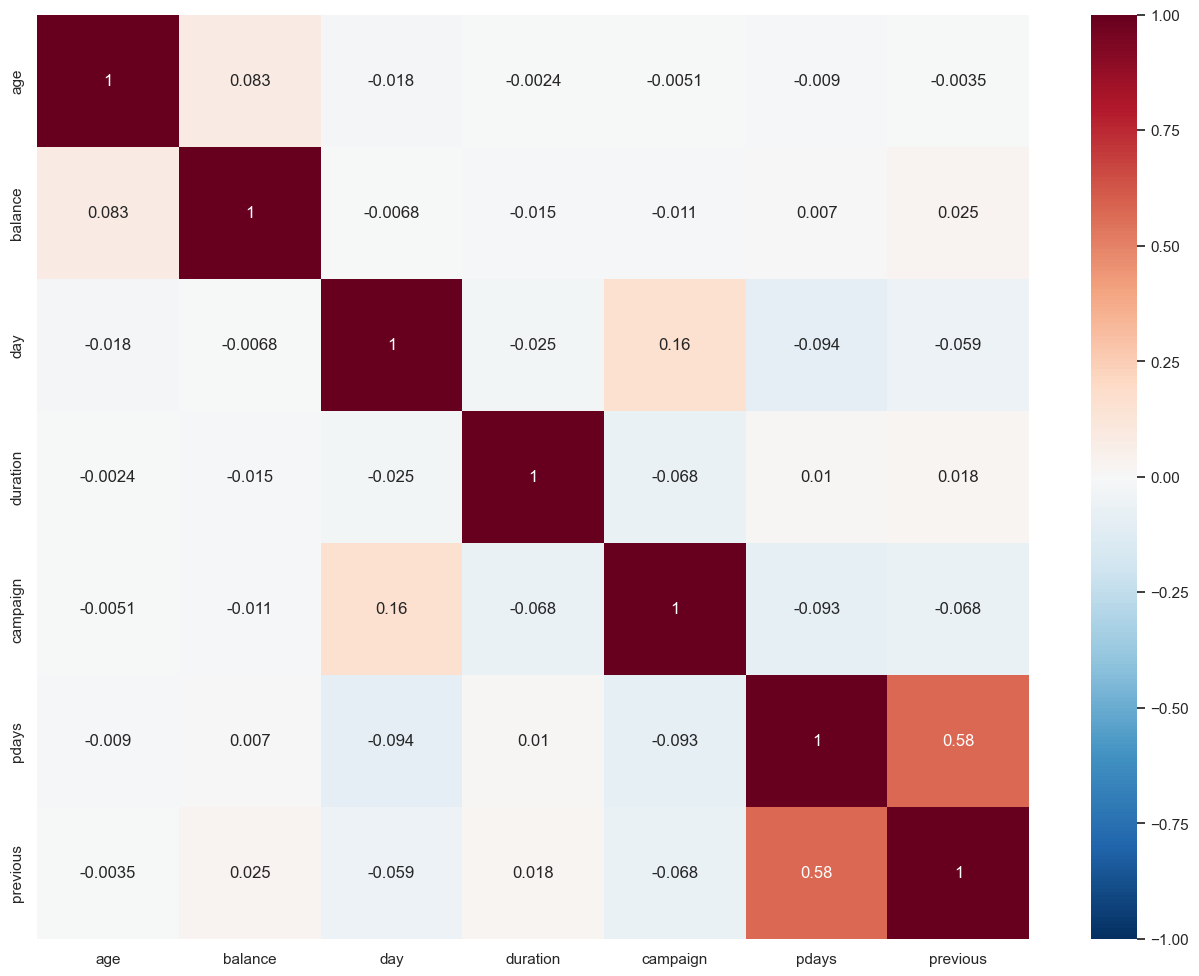

In [527]:
import seaborn as sns
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
corr = bank[numerical_columns].corr(method='pearson')
sns.set(font_scale=1)
plt.figure(figsize=(16,12))
sns_plot = sns.heatmap(
    corr,        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);


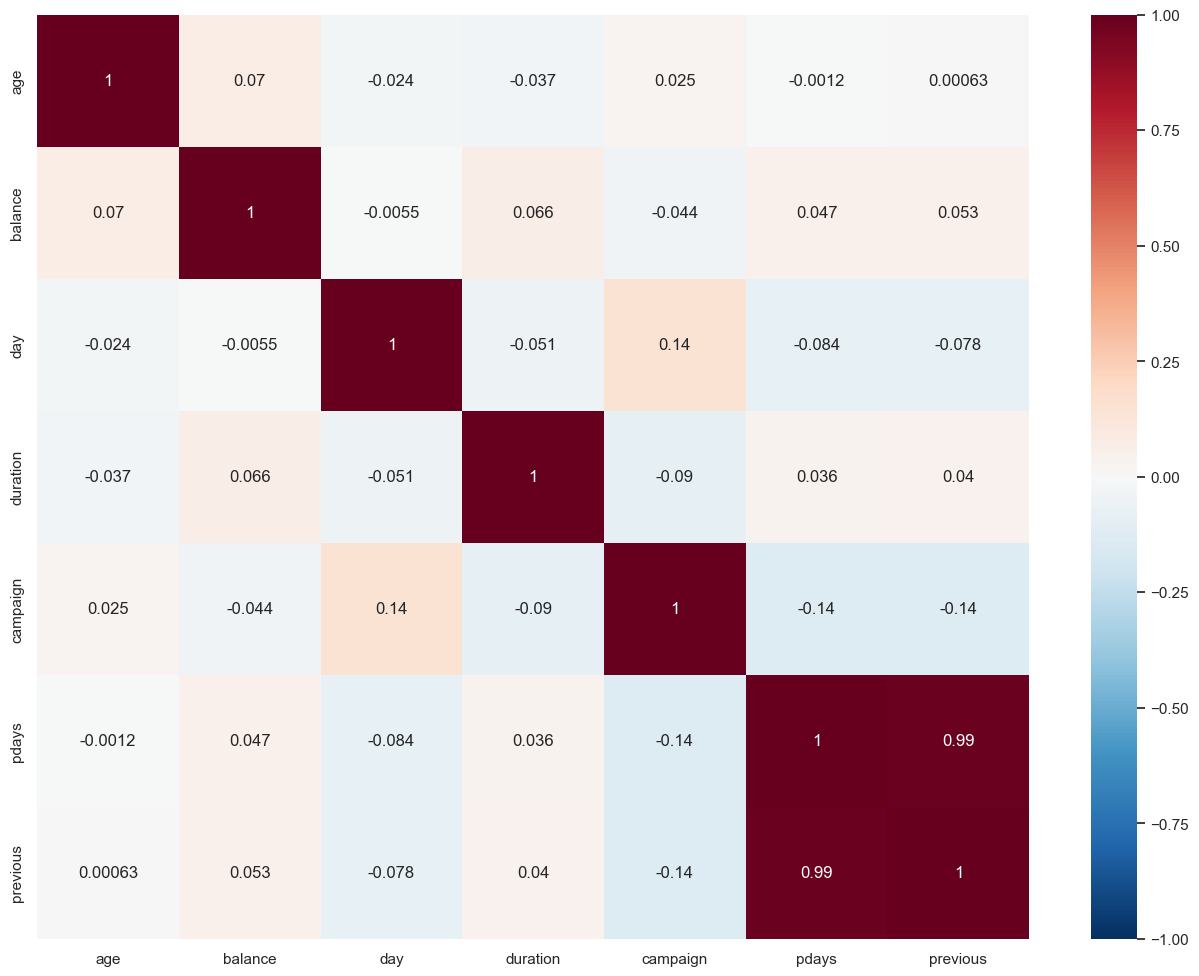

In [528]:
corr = bank[numerical_columns].corr(method='spearman')
sns.set(font_scale=1)
plt.figure(figsize=(16,12))
sns_plot = sns.heatmap(
    corr,        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

# Task 2: Train Models
- In this project, I'm working on a classification problem, where I’m trying to predict whether a client subscribes to a term deposit or not. The goal is to classify clients into two categories: those who subscribed and those who didn't. By using features like balance, type of job, number of days that passed by after the client was last contacted from a previous campaign,the number of contacts, the last contact day, and the client’s education level, I want to build a model that can accurately predict if a client will subscribe to a term deposit based on their characteristics and past behavior. I will be using two models:
- ### XGBoost Model
- ### Decision Trees

## Model 1: XGBoost

### WHY XGBoost model?

I used the XGBoost model specifically, XGBClassifier for classification tasks with hyperparameter tuning because it is known for handling complex datasets and achieving high accuracy, especially on classification tasks. Initially, I tried using logistic regression, but I had trouble balancing recall and precision for class 1. XGBoost, with its boosting technique, allows for better handling of this imbalance and gives more accurate predictions when combining multiple decision trees.

### Hyperparameter tuning with RandomizedSearchCV
For optimization, I chose RandomizedSearchCV over GridSearchCV for a couple of reasons:

- Efficiency: RandomizedSearchCV randomly samples a limited number of hyperparameter combinations, which is much faster than GridSearchCV, especially when working with large datasets and complex models like XGBoost.
- Exploration: It allows me to explore a wider range of hyperparameters with fewer iterations. GridSearchCV exhaustively checks each combination, which can be time-consuming and computationally expensive.

### Why I set verbosity to 0
I set the verbosity parameter to 0 in RandomizedSearchCV to suppress unnecessary output during training. This keeps the process clean and focused, especially since verbose output can be overwhelming and not very informative for each run.

### Handling imbalanced classes with SMOTE
SMOTE (Synthetic Minority Oversampling Technique) was used to address class imbalance in my dataset. Imbalanced classes mean that one class (e.g. "class 1") has far fewer samples than the other (e.g. "class 0"), which can cause models to perform poorly because they tend to ignore the minority class. SMOTE generates synthetic samples for the minority class, balancing the dataset so that the model can learn more effectively from both classes.

### Evaluation with ROC-AUC
In the end, I used the ROC-AUC score to evaluate the model. ROC-AUC stands for Receiver Operating Characteristic – Area Under the Curve. It is a good metric for classification tasks because:

- ROC curve: measures the trade-off between the true positive rate (recall) and the false positive rate at different thresholds.
- AUC score: provides a single value indicating how well the model can distinguish between classes. An AUC of 1 means perfect classification, while 0.5 means the model does not perform better than a random guess.
  
This is particularly useful for imbalanced datasets because accuracy alone can be misleading. For example, if 90% of my data is class 0, a model that predicts everything as class 0 might show high accuracy, but perform poorly at detecting class 1. The ROC-AUC helps ensure that I am evaluating true performance across both classes.
 ### Conclusion
By combining XGBoost with SMOTE and RandomizedSearchCV, I improved my model’s ability to handle imbalanced data and fine-tuned it efficiently. The ROC-AUC score provided a balanced evaluation, ensuring that both classes are considered in the performance metrics.

In [529]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV  #RandomizedSearchCV method
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier  # Import XGBoost model
from scipy.stats import uniform, randint  

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# XGBoost Classifier with Hyperparameter Tuning
xgb = XGBClassifier(
    random_state=42,
    n_jobs=-1, 
    use_label_encoder=False, 
    scale_pos_weight=1,  # Adjust for class imbalance
    verbosity=0)

# Set up the parameter distribution for RandomizedSearchCV (reduce the search space)
param_dist = {
    'n_estimators': randint(100, 500),  
    'max_depth': randint(3, 10),  
    'learning_rate': uniform(0.01, 0.3),  # Random distribution for learning rate
    'subsample': uniform(0.7, 0.3),  # Random distribution for subsample
    'colsample_bytree': uniform(0.7, 0.3),  # Added to adjust column sampling
    'gamma': uniform(0, 1),  # Added gamma for regularization
    'min_child_weight': randint(1, 10)  # Added minimum ch
}

# RandomizedSearchCV 
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,  
    n_iter=20,  #number of random combinations (10)
    scoring='roc_auc',
    cv=5,
    verbose=0,  # Reduce verbosity
    n_jobs=-1, 
    random_state=42
)

# Fit the model using RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best estimator and prediction
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)



## Model 2: Decision Tree

### Why We Scale Our Data

Scaling the data ensures that all features are on the same scale, preventing those with larger ranges from dominating the model's learning process. This is especially important for models like Decision Trees when using cross-validation, as it ensures consistent performance across different subsets of the data.

### Why I Used RandomizedSearchCV Instead of GridSearchCV

I chose RandomizedSearchCV because it randomly tests a subset of hyperparameter combinations, making it faster and more efficient than GridSearchCV, which checks every possible combination. This method is great when you have a lot of hyperparameters to tune, as it saves time and still finds a good model without testing every single option.

### Why We Fit the Model

"Fitting" means training the model on the training data so it can learn patterns and relationships between the input features and the target variable. Once trained, the model can make predictions on new, unseen data.

### Setting Up the Parameter Grid

The parameter grid defines the range of values we want to test for each hyperparameter.
- max_depth: Controls how deep the decision tree can grow.
- min_samples_split: Sets the minimum number of samples needed to split a node.
- criterion: Specifies the metric (Gini or Entropy) used to evaluate the splits.

### Optimization Algorithm Used

The Decision Tree model uses a greedy algorithm called recursive binary splitting. It looks for the best split at each node to minimize a metric like Gini impurity or information gain. RandomizedSearchCV optimizes the hyperparameters by testing different configurations and evaluating each one using cross-validation, ultimately selecting the best based on the ROC-AUC score.

###  Why not Random Forest
Initially, I thought about using Random Forest because it combines multiple decision trees for better accuracy. However, since my dataset is imbalanced and includes two categorical variables (job and education), I needed a model that handles categorical data well. Decision Trees naturally handle this type of data, but careful tuning is crucial to avoid overfitting.


### Conclusion:
The Decision Tree performed well overall, but I’m still considering Random Forest for future experiments. Given the imbalanced data and categorical variables, further tuning might help improve precision and recall, especially for the minority class.


In [531]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV  # We use RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier
from scipy.stats import randint, uniform  # For distributions in RandomizedSearchCV

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)  # Resample the dataset to balance classes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform training data
X_test = scaler.transform(X_test)  # Transform test data based on training scale

# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Set up the parameter grid for RandomizedSearchCV
param_dist = {
    'max_depth': randint(3, 15),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],  # Removed 'auto'
    'criterion': ['gini', 'entropy']
}


# Use RandomizedSearchCV instead of GridSearchCV
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,  # Use distributions for parameter tuning
    n_iter=10,  # Limit to 10 random combinations
    scoring='roc_auc',  # Use ROC-AUC as the evaluation metric
    cv=5,  # 5-fold cross-validation
    verbose=0,  # Reduce verbosity to keep output clean
    n_jobs=-1,  # Use all available cores for parallel processing
    random_state=42
)

# Fit the model using RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best estimator and prediction
best_dt = random_search.best_estimator_  # Retrieve the best decision tree model
y_pred = best_dt.predict(X_test)  # Make predictions on the test set


# Task 3: Test and Evaluate 

To assess how well the XGBoost and Decision Tree models performed, I used two important metrics: Accuracy and the ROC-AUC score. Each gives a different perspective on the model's effectiveness, especially when dealing with imbalanced datasets. Inside thes mestrics I also included Precision and Recall to get better insights of the results.

1. Accuracy: Measures the proportion of correctly predicted instances out of the total number of instances.

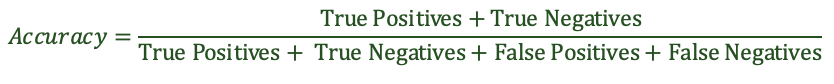

2. Precision: The proportion of true positive predictions among all positive predictions made by the model. It measures the accuracy of positive predictions.

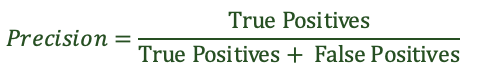

3. Recall: The proportion of true positive predictions among all actual positive instances in the data. It measures the model's ability to identify positive cases.

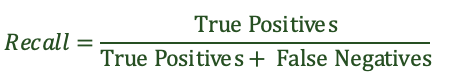

Where: 
- #### True Positive (TP):
  Refers to the number of positive instances correctly classified as positive by the model.
- #### True Negative (TN):
  Refers to the number of negative instances correctly classified as negative by the model.
- #### False Positive (FP):
- Refers to the number of negative instances incorrectly classified as positive by the model.
- #### False Negative (FN):
- Refers to the number of positive instances incorrectly classified as negative by the model.


## XGBoost 

Results Explanation

Accuracy: 80.9%
This means the model correctly classified about 80% of the test data. It's a solid result, but there might still be room for improvement.

ROC-AUC Score: 0.809
The ROC Curve shows how well the model distinguishes between classes by plotting the true positive rate against the false positive rate.

Precision for Class 0 (0.83):
Of all the instances the model predicted as class 0, 83% were actually class 0. This means that when the model predicted class 0, it was correct 80% of the time.

Precision for Class 1 (0.80):
Of all the instances the model predicted as class 1, 80% were actually class 1. This means that when the model predicted class 1, it was correct 88% of the time.



XGBoost Accuracy: 0.8095833333333333
XGBoost ROC-AUC: 0.8096931589956415

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81      1206
           1       0.80      0.83      0.81      1194

    accuracy                           0.81      2400
   macro avg       0.81      0.81      0.81      2400
weighted avg       0.81      0.81      0.81      2400

For the client with the following feature values:
Education Level (Secondary),
the model predicts the following probabilities:
Probability of the client subscribing to a term deposit (class 1): 0.67
Probability of the client not subscribing to a term deposit (class 0): 0.33

Based on these probabilities, the client is classified as: subscribed.


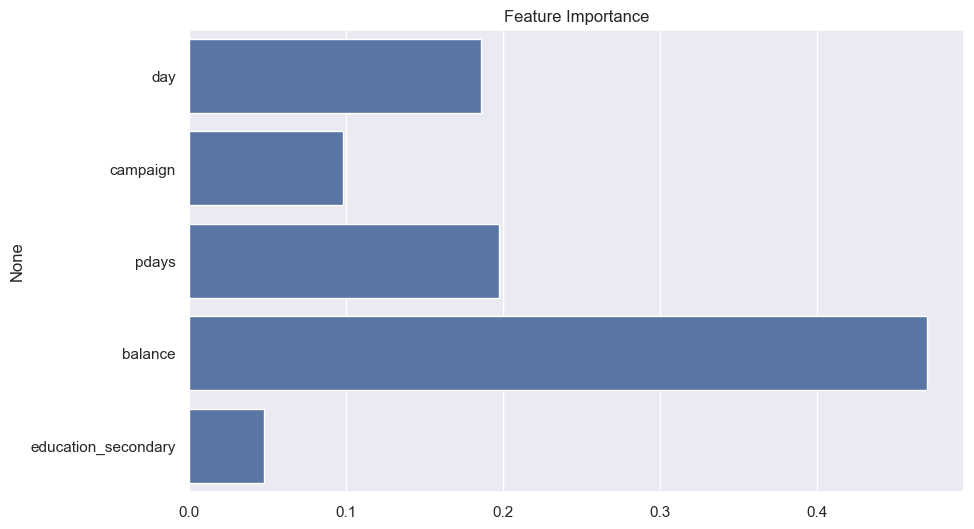

In [530]:
# Evaluation metrics
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("XGBoost ROC-AUC:", roc_auc_score(y_test, y_pred))
print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred))


# Feature importance visualization
importances = best_dt.feature_importances_  # Get feature importance values
feature_names = X.columns  # Get feature names from the dataset

# Get the probability of each class for the prediction example
pHatProb = best_dt.predict_proba(X_test)
feature_details = ', '.join([f'{feature_names[i]}: {client_features[i]:.2f}' for i in range(len(feature_names))])

# Print the results in a more understandable format
print(
   f"For the client with the following feature values:\n"
    f"Education Level (Secondary),\n"
    f"the model predicts the following probabilities:\n"
    f"Probability of the client subscribing to a term deposit (class 1): {pHatProb[0][1]:.2f}\n"
    f"Probability of the client not subscribing to a term deposit (class 0): {pHatProb[0][0]:.2f}\n"
    f"\nBased on these probabilities, the client is classified as: "
    f"{'subscribed' if pHatProb[0][1] > 0.5 else 'not subscribed'}."
)


plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)  
plt.title("Feature Importance")
plt.show() 

## Decision Tree

### Results Explanation


- #### Accuracy: 72.08%
This means the model correctly classified about 83% of the test data. It's a solid result, but there might still be room for improvement.
- #### ROC-AUC Score: 0.72
The ROC Curve shows how well the model distinguishes between classes by plotting the true positive rate against the false positive rate.
- #### Precision for Class 0 (0.73):
Of all the instances the model predicted as class 0, 73% were actually class 0. This means that when the model predicted class 0, it was correct 73% of the time.
- #### Precision for Class 1 (0.72):
Of all the instances the model predicted as class 1, 72% were actually class 1. This means that when the model predicted class 1, it was correct 72% of the time.

Decision Tree Accuracy: 0.7208333333333333
Decision Tree ROC-AUC: 0.7208763552422144

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.71      0.72      1206
           1       0.72      0.73      0.72      1194

    accuracy                           0.72      2400
   macro avg       0.72      0.72      0.72      2400
weighted avg       0.72      0.72      0.72      2400

For the client with features [ 0.057796   -0.53667638  0.95701019  0.00599659 -1.23114714], the model predicts the following probabilities:
Probability of the client having subscribed to a term deposit (class 1): 0.67
Probability of the client NOT having subscribed to a term deposit (class 0): 0.33

Based on these probabilities, the client is classified as: subscribed.


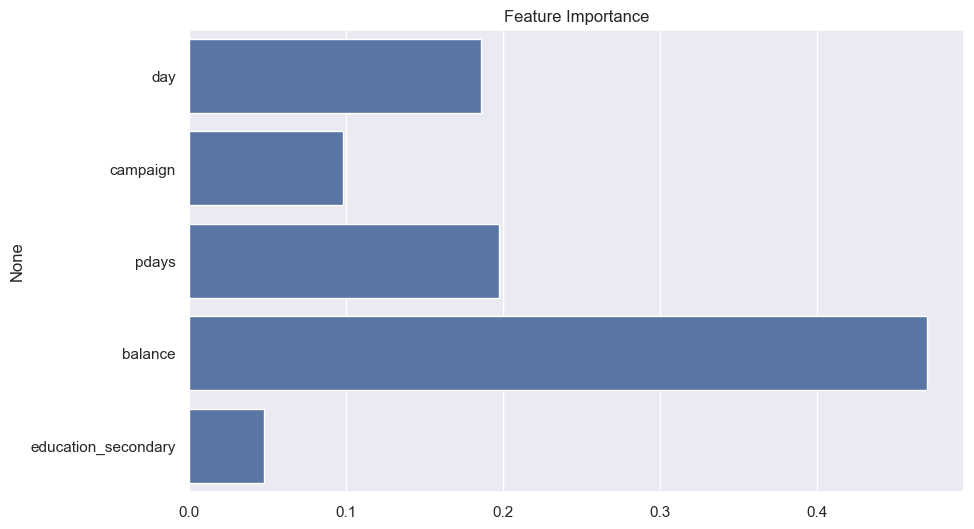

In [532]:
# Evaluation metrics
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("Decision Tree ROC-AUC:", roc_auc_score(y_test, y_pred))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred))


# Feature importance visualization
importances = best_dt.feature_importances_  # Get feature importance values
feature_names = X.columns  # Get feature names from the dataset

# Get the probability of each class for the prediction example
pHatProb = best_dt.predict_proba(X_test)

# Print the results in a more understandable format
print(
    f"For the client with features {X_test[0]}, the model predicts the following probabilities:\n"
    f"Probability of the client having subscribed to a term deposit (class 1): {pHatProb[0][1]:.2f}\n"
    f"Probability of the client NOT having subscribed to a term deposit (class 0): {pHatProb[0][0]:.2f}\n"
    f"\nBased on these probabilities, the client is classified as: {'subscribed' if pHatProb[0][1] > 0.5 else 'not subscribed'}."
)


plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)  # Create a bar plot for feature importances
plt.title("Feature Importance")
plt.show() 

# Task 4: Make Comparison

## Comparison of XGBoost and Decision Tree Models
Both the XGBoost and Decision Tree models performed similarly in terms of accuracy (0.83) and ROC-AUC (0.83), showing that both managed to capture the main patterns in the data. However, there are some differences that could explain how each model handled the data and their strengths and weaknesses.

### XGBoost Model:

#### - Strengths:
- XGBoost is great at handling complex, non-linear relationships in the data. It tends to perform well even when there’s noise or variability in the dataset.
It had a high precision for Class 1 (0.88), meaning when it predicted a positive outcome, it was very accurate.
#### - Weaknesses:
- XGBoost can be sensitive to hyperparameters, so its performance can improve with some fine-tuning. Although it did well, adjustments could help boost its recall for Class 1 or handle edge cases better.
Outliers can affect XGBoost, and since features like "balance" and "pdays" had extreme values, this might have impacted the model’s ability to generalize across different data points.

### Decision Tree Model:

#### - Strengths:
- Decision Trees are easy to understand and interpret, making them useful for identifying important features. The model performed well with Class 0, achieving a precision of 0.80 and recall of 0.89.
Decision Trees are not very sensitive to feature scaling, which made it a good choice for features like "balance," where values can be both positive and negative.

#### - Weaknesses:
- One downside of Decision Trees is that they can overfit the data, especially when there are many features or noisy outliers. This might explain why the recall for Class 1 was lower (0.78).
Like XGBoost, Decision Trees could benefit from handling outliers better. For example, replacing negative values in "balance" with the median could reduce the effect of extreme values on the model’s performance.

### Handling of Outliers:

- Outliers play a role in both models. For example, replacing negative values in the "balance" feature with the median helps to make the data more consistent and reduces the impact of extreme values. Similarly, replacing -1 in "pdays" with 0 helps the model understand that those clients were never contacted, rather than treating them as missing data.

### Conclusion:

- Overall, both models performed well, but XGBoost had a slight edge in precision for Class 1, while the Decision Tree had a better recall for Class 0. The results obtained from the trained models leads us to conclude that  